Nama : Errens Joerdhi Fahrezi
---
NPM : 240310220006

In [15]:
!pip install requests beautifulsoup4 pandas transformers textblob wordcloud

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

## Mengambil data semua link yang akan di scrape

In [17]:
# Memasukan link berita
link_berita = "https://lite.cnn.com"
scrape_url = []
detail_berita = []

try:
    respon = requests.get(link_berita)
    respon.raise_for_status()
    soup = BeautifulSoup(respon.text, 'html.parser')
    semua_artikels = soup.find_all('li')

    if len(semua_artikels) >= 52:
        selected_articles = semua_artikels[:5] + semua_artikels[47:52] + semua_artikels[-5:]
        for article in selected_articles:
            link_tag = article.find('a')
            if link_tag and 'href' in link_tag.attrs:
                full_url = link_berita + link_tag['href']
                if full_url not in scrape_url:
                    scrape_url.append(full_url)
        print(f"Scraping selesai.")
    else:
        print(f"Berita tidak cukup.")

except Exception as e:
    print(f"Proses Gagal. Error: {e}")

Scraping selesai.


## Mengambil data detail berita

In [18]:
if scrape_url:
    for i, url in enumerate(scrape_url, 1):
        try:
            page = requests.get(url)
            soup_detail = BeautifulSoup(page.text, 'html.parser')

            # Judul dari beritanya
            tag_judul = soup_detail.find("div", class_="headline--lite")
            judul = tag_judul.find("h2", class_="headline").text.strip() if tag_judul else "N/A"

            # Penulis Berita
            tag_penulis = soup_detail.find('p', class_="byline--lite")
            penulis = tag_penulis.text.replace("By", "").strip() if tag_penulis else "N/A"

            # Sumber
            tag_sumber = soup_detail.find('p', class_="source--lite")
            sumber = tag_sumber.text.strip() if tag_sumber else "N/A"

            # Baris Pertama
            tag_baris_pertama = soup_detail.find('p', class_='paragraph--lite')
            baris_pertama_berita = tag_baris_pertama.text.strip() if tag_baris_pertama else "N/A" # Corrected variable name

            # Mengambil Link Detail
            link_lengkap = "N/A"
            # Mencari tag <a>
            link_lengkap_tag = soup_detail.find('a', string=re.compile(r"See Full Web Article"))
            if link_lengkap_tag and link_lengkap_tag.has_attr('href'):
                link_lengkap = link_lengkap_tag['href']

            tanggal = "N/A"
            jam = "N/A"
            timestamp_tag = soup_detail.find('p', class_="timestamp--lite")
            if timestamp_tag:
                full_timestamp_text = timestamp_tag.text.strip()

                # Mengambil jam
                if ":" in full_timestamp_text and "," in full_timestamp_text:
                    start = full_timestamp_text.find(':') + 1
                    end = full_timestamp_text.find(',')
                    jam = full_timestamp_text[start:end].strip()

                # Mengambil Tanggal
                if "," in full_timestamp_text:
                    tanggal_parts = full_timestamp_text.split(',')[1:]
                    tanggal = ','.join(tanggal_parts).strip()

            # List semua detail berita
            detail_berita.append({
                "Judul": judul,
                "Penulis": penulis,
                "Tanggal Terbit": tanggal,
                "Jam Terbit": jam,
                "Sumber": sumber,
                "Baris Pertama": baris_pertama_berita,
                "Link Berita Utuh": link_lengkap,
                "Link Berita Lite": url
            })
            print(f"  ({i}/{len(scrape_url)}) Berhasil scrape: {judul}")

        except Exception as e:
            print(f"  ({i}/{len(scrape_url)}) Gagal scrape {url}. Error: {e}")
else:
    print("Tidak ada URL untuk di-scrape.")

  (1/15) Berhasil scrape: Matthew Schaefer honors late mother after getting selected first overall by New York Islanders in NHL draft
  (2/15) Berhasil scrape: Trump’s trade deals are stalling out at the worst possible time
  (3/15) Berhasil scrape: How one couple saved nearly $3,000 a month by moving to Italy
  (4/15) Berhasil scrape: Final battle damage assessment of US strikes on Iran will be key in US push for Iran nuclear deal
  (5/15) Berhasil scrape: What’s next for Bryan Kohberger’s defense after judge dismissed bid for ‘alternate perpetrator’ theory
  (6/15) Berhasil scrape: Trade talks probably won’t be done by Trump’s July 9 deadline, Treasury Secretary Bessent says
  (7/15) Berhasil scrape: Elon Musk isn’t happy with his AI chatbot. Experts worry he’s trying to make Grok 4 in his image
  (8/15) Berhasil scrape: They call it ‘Merzcron’: The EU’s Franco-German engine is powering up once again
  (9/15) Berhasil scrape: Americans reined in their spending last month
  (10/15) Be

In [19]:
df_berita = pd.DataFrame(detail_berita)

print("\nDataFrame Data Detail Berita:")
df_berita.head(6)


DataFrame Data Detail Berita:


,Judul,Penulis,Tanggal Terbit,Jam Terbit,Sumber,Baris Pertama,Link Berita Utuh,Link Berita Lite
0,Matthew Schaefer honors late mother after gett...,"Jacob Lev, CNN","Sat June 28, 2025",5:34 AM EDT,Source: CNN,"Just over a year ago, Matthew Schaefer lost hi...",https://www.cnn.com/2025/06/28/sport/matthew-s...,https://lite.cnn.com/2025/06/28/sport/matthew-...
1,Trump’s trade deals are stalling out at the wo...,"Analysis by David Goldman, CNN","Sat June 28, 2025",5:00 AM EDT,Source: CNN,With just a week and a half remaining of a 90-...,https://www.cnn.com/2025/06/28/economy/trade-d...,https://lite.cnn.com/2025/06/28/economy/trade-...
2,"How one couple saved nearly $3,000 a month by ...","Maureen O'Hare, CNN","Sat June 28, 2025",5:00 AM EDT,Source: CNN,In travel news this week: how to get the Itali...,https://www.cnn.com/2025/06/28/travel/travel-n...,https://lite.cnn.com/2025/06/28/travel/travel-...
3,Final battle damage assessment of US strikes o...,"Analysis by Kylie Atwood, CNN","Sat June 28, 2025",5:00 AM EDT,Source: CNN,As the Trump administration looks to quickly p...,https://www.cnn.com/2025/06/28/politics/damage...,https://lite.cnn.com/2025/06/28/politics/damag...
4,What’s next for Bryan Kohberger’s defense afte...,"Jean Casarez, Zoe Sottile, CNN","Sat June 28, 2025",4:00 AM EDT,Source: CNN,It’s been a tough week for Bryan Kohberger’s d...,https://www.cnn.com/2025/06/28/us/bryan-kohber...,https://lite.cnn.com/2025/06/28/us/bryan-kohbe...
5,Trade talks probably won’t be done by Trump’s ...,"John Towfighi, CNN","Fri June 27, 2025",11:30 AM EDT,Source: CNN,Treasury Secretary Scott Bessent on Friday sai...,https://www.cnn.com/2025/06/27/business/trade-...,https://lite.cnn.com/2025/06/27/business/trade...


In [20]:
df_berita.to_csv('240310220006_Limabelas_1.csv', index=False)
print("DataFrame telah disimpan di file CSV 240310220006_Limabelas_1.csv")

DataFrame telah disimpan di file CSV 240310220006_Limabelas_1.csv


## Proses Analisis Sentimen

In [21]:
polarity = []
subjectivity = []

if not df_berita.empty:
    for teks in df_berita["Baris Pertama"]:
        result = TextBlob(teks)

        polarity.append(result.sentiment.polarity)
        subjectivity.append(result.sentiment.subjectivity)

    print("Analisis Sentimen Selesai.")
    print(f"Jumlah polarityitas yang dihitung: {len(polarity)}")
    print(f"Jumlah subjektivitas yang dihitung: {len(subjectivity)}")
else:
    print("DataFrame kosong. Tidak dapat melakukan analisis sentimen.")

Analisis Sentimen Selesai.
Jumlah polarityitas yang dihitung: 15
Jumlah subjektivitas yang dihitung: 15


In [22]:
# Sentimen Textblob
df_berita["polarity_blob"] = polarity
df_berita["subjectivity_blob"] = subjectivity

Sentimen Huggingface

In [23]:
model = "tabularisai/multilingual-sentiment-analysis"
analyze = pipeline("text-classification", model=model)

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [24]:
labels = []
scores = []

for teks in df_berita["Baris Pertama"]:
  if isinstance(teks, str):
      try:
          result = analyze(teks)
          hf_label = result[0]["label"]
          hf_score = result[0]["score"]
          labels.append(hf_label)
          scores.append(hf_score)
      except Exception as e:
          print(f"Error processing text: {teks[:50]}... Error: {e}")
          labels.append("Error")
          scores.append(0.0)
  else:
      print(f"Skipping non-string text: {teks}")
      labels.append("Not String")
      scores.append(0.0)


df_berita["hf_label"] = labels
df_berita["hf_score"] = scores

display(df_berita[["Baris Pertama", "hf_label", "hf_score"]])

,Baris Pertama,hf_label,hf_score
0,"Just over a year ago, Matthew Schaefer lost hi...",Very Positive,0.395271
1,With just a week and a half remaining of a 90-...,Negative,0.445309
2,In travel news this week: how to get the Itali...,Neutral,0.410573
3,As the Trump administration looks to quickly p...,Neutral,0.463730
4,It’s been a tough week for Bryan Kohberger’s d...,Negative,0.377826
5,Treasury Secretary Scott Bessent on Friday sai...,Neutral,0.377262
6,"Last week, Grok, the chatbot from Elon Musk’s ...",Negative,0.449675
7,The clasped hands of French and German leaders...,Neutral,0.335997
8,The US economic engine sputtered in May: Consu...,Negative,0.420017
9,The dreaded “blue screen of death” that has to...,Very Negative,0.767867


In [25]:
df_berita.to_csv('240310220006_Limabelas.csv', index=False)
print("DataFrame telah disimpan di file CSV 240310220006_Limabelas.csv")

DataFrame telah disimpan di file CSV 240310220006_Limabelas.csv


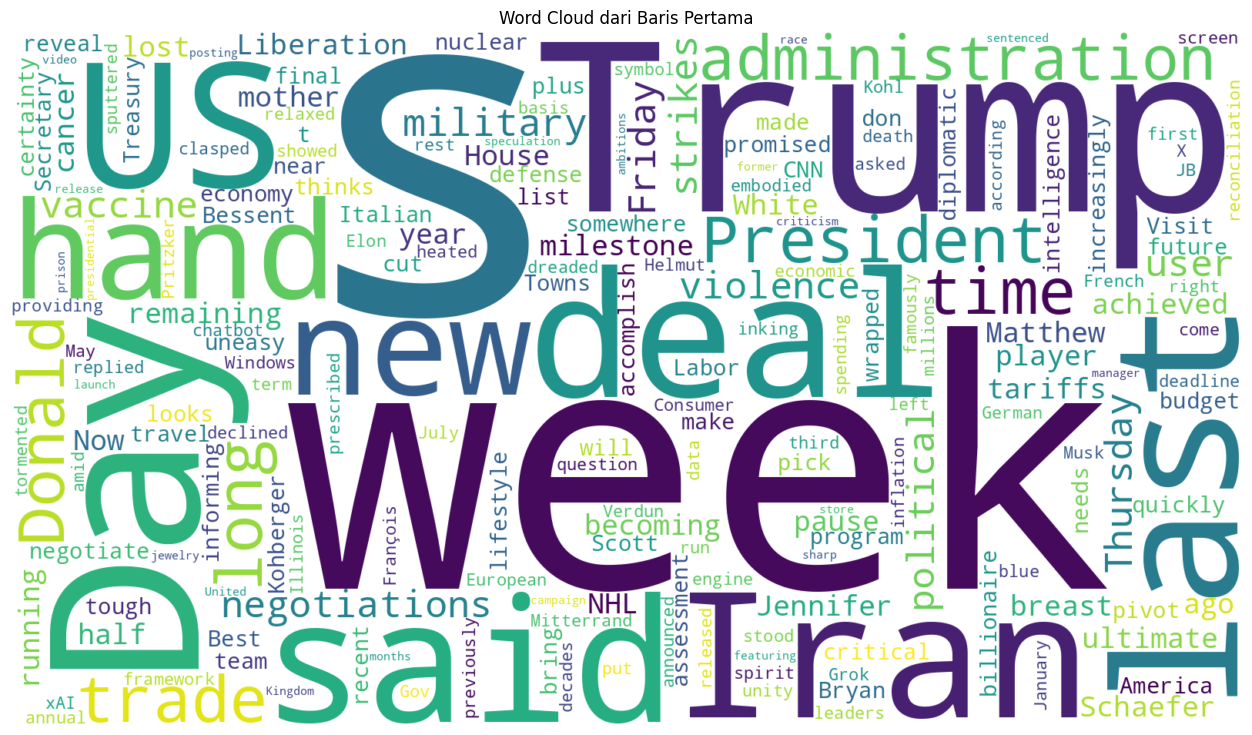

In [26]:
# Gabungan semua baris pertama
all_text = " ".join(df_berita['Baris Pertama'].dropna())

wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(all_text)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Baris Pertama')
plt.show()

In [27]:
# Menyimpan wordcloud ke dalam sebuah file
OUTPUT_WORDCLOUD_PATH = 'wordcloud.png'
plt.savefig(OUTPUT_WORDCLOUD_PATH, dpi=300, bbox_inches='tight')

plt.show()
print(f"WordCloud berhasil disimpan")

<Figure size 640x480 with 0 Axes>

WordCloud berhasil disimpan


In [28]:
from google.colab import files

OUTPUT_CSV_PATH = '240310220006_Limabelas.csv'
df_berita.to_csv(OUTPUT_CSV_PATH, index=False)

print(f"\nDataFrame berhasil disimpan ke dalam file CSV: {OUTPUT_CSV_PATH}")

files.download(OUTPUT_CSV_PATH)
print(f"File CSV '{OUTPUT_CSV_PATH}' siap untuk diunduh.")


DataFrame berhasil disimpan ke dalam file CSV: 240310220006_Limabelas.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File CSV '240310220006_Limabelas.csv' siap untuk diunduh.
